## Access Satellite Ghrsst L3S 1Day Nighttime Multi Sensor Australia data in Zarr
A jupyter notebook to show how to access and plot the AODN satellite_ghrsst_l3s_1day_nighttime_multi_sensor_australia dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/d3e3bce3-adb4-433a-a192-93abc91899d3).

📌 The point of truth for this notebook is [on GitHub](https://github.com/aodn/aodn_cloud_optimised/tree/main/notebooks/satellite_ghrsst_l3s_1day_nighttime_multi_sensor_australia.ipynb).

In [1]:
dataset_name = "satellite_ghrsst_l3s_1day_nighttime_multi_sensor_australia"

## Install/Update packages and Load common functions

import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

In [2]:
from DataQuery import GetAodn

/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:3187: UserWarning: registration of accessor <class 'DataQuery.AODNAccessor'> under name 'aodn' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("aodn")


# Understanding the Dataset

In [3]:
# remote zarr dataset
aodn = GetAodn()
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 462 ms, sys: 55.1 ms, total: 517 ms
Wall time: 1.02 s


## Plot time coverage

In [4]:
aodn_dataset.get_temporal_extent()

(Timestamp('2024-01-01 15:20:00'), Timestamp('2025-11-01 15:20:00'))

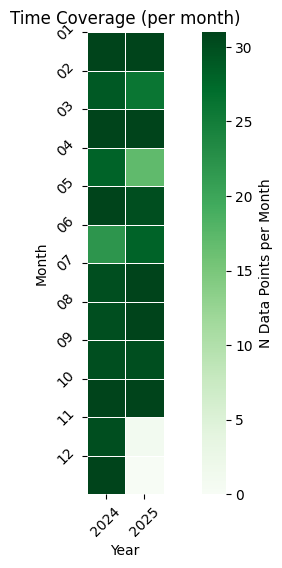

In [5]:
aodn_dataset.plot_time_coverage()

## Timeseries at a point

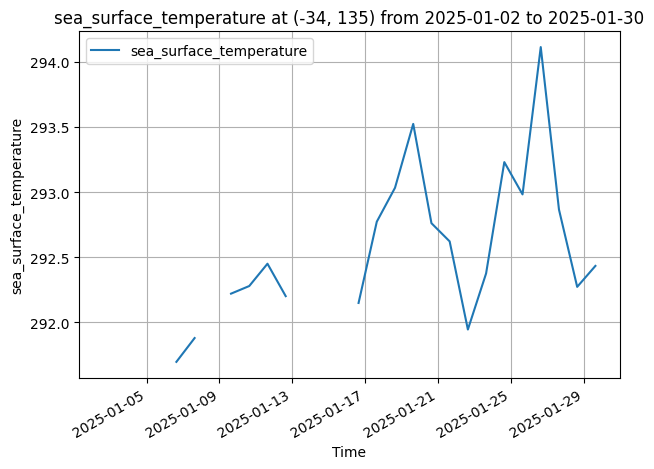

CPU times: user 823 ms, sys: 155 ms, total: 978 ms
Wall time: 1.29 s


In [6]:
%%time
time_series_df = aodn_dataset.get_timeseries_data(var_name='sea_surface_temperature', 
                                                  lat=-34, 
                                                  lon=135, 
                                                  date_start='2025-01-02',
                                                  date_end='2025-01-30', 
                                                  lon_name_override="lon", 
                                                  lat_name_override="lat").plot_timeseries()

## Plot a gridded variable

2025-11-04 15:17:57,370 - aodn.GetAodn - INFO - Plotting 'sea surface skin temperature' for 6 time steps.
/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:2757: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(


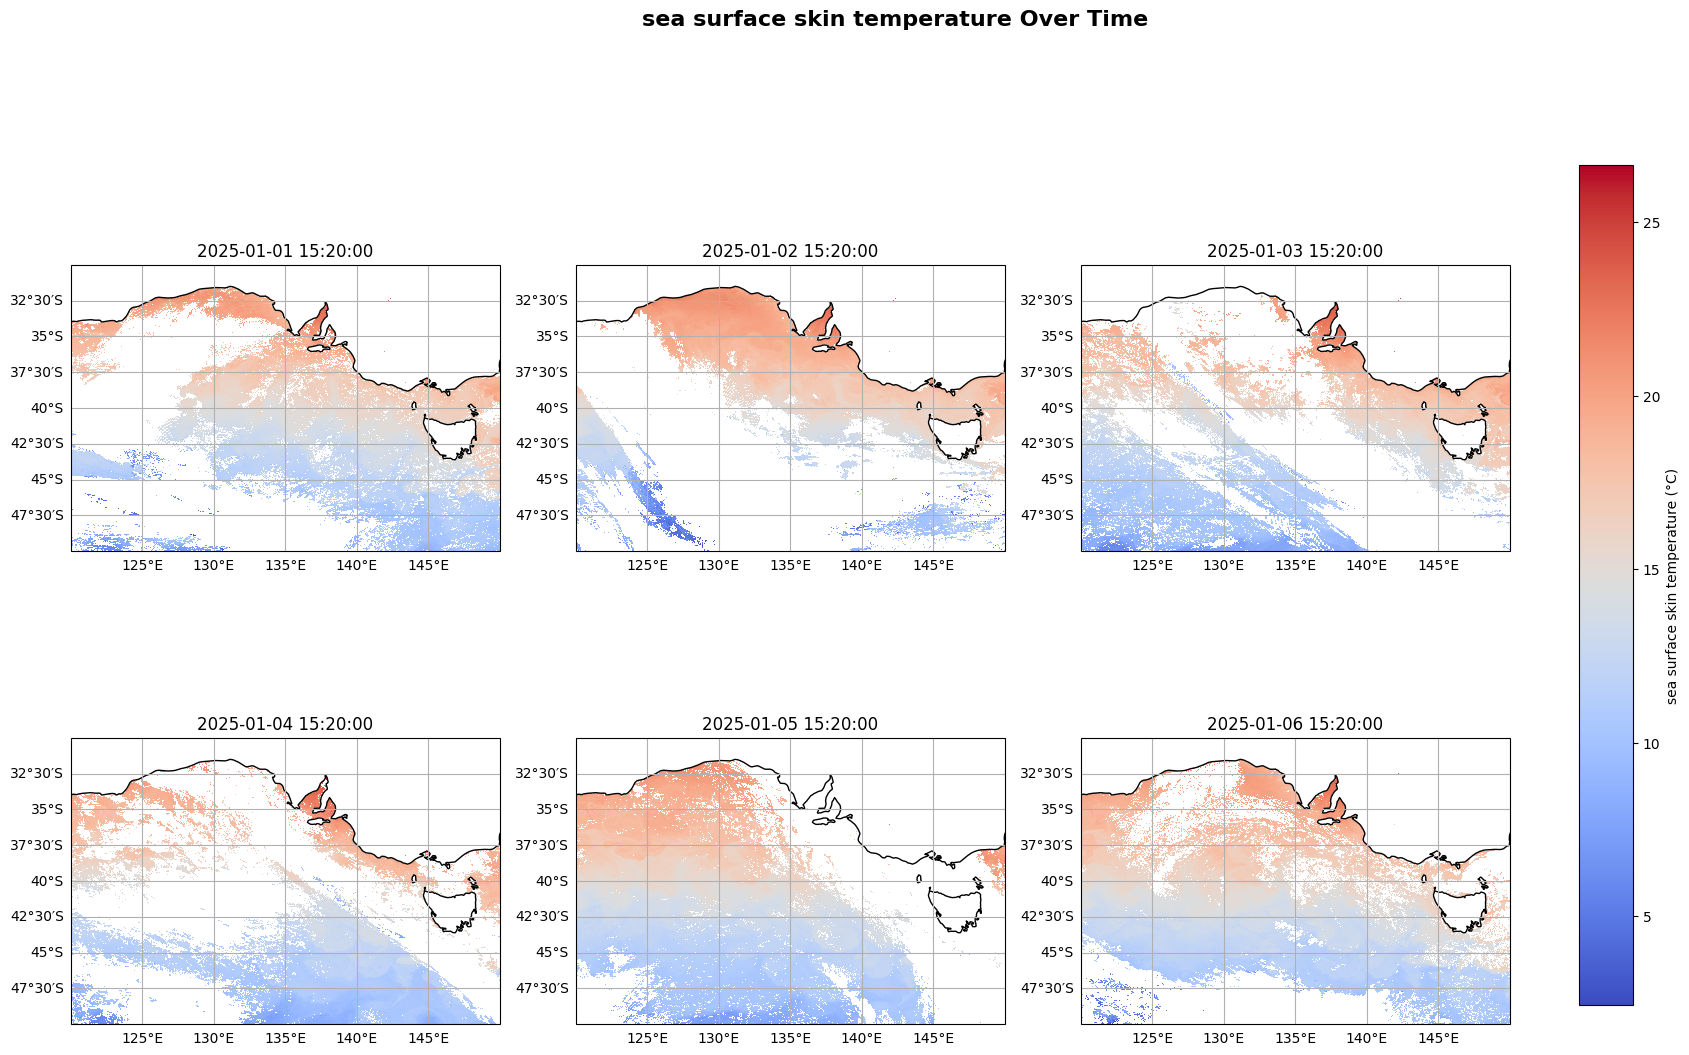

CPU times: user 5.64 s, sys: 3.29 s, total: 8.94 s
Wall time: 6.97 s


In [7]:
%%time
time_series_df = aodn_dataset.plot_gridded_variable(var_name='sea_surface_temperature', 
                                                    date_start='2025-01-02',                                                
                                                    lon_name_override="lon", 
                                                    lat_name_override="lat", 
                                                    lon_slice=(120, 150), 
                                                    lat_slice=(-50, -30), 
                                                    n_days=6, 
                                                    coastline_resolution="50m", 
                                                    log_scale=False)

## Querying data without plotting

In [8]:
ds=aodn_dataset.get_data(date_start='2025-10-25',  
                         date_end='2025-11-05',                                              
                         lon_min=80,
                         lon_max=160, 
                         lat_min=-50, 
                         lat_max=-40,)

In [9]:
ds

<xarray.Dataset> Size: 832MB
Dimensions:                  (time: 8, lat: 500, lon: 4000)
Coordinates:
  * lat                      (lat) float32 2kB -40.01 -40.03 ... -49.97 -49.99
  * lon                      (lon) float32 16kB 80.01 80.03 ... 160.0 160.0
  * time                     (time) datetime64[ns] 64B 2025-10-25T15:20:00 .....
Data variables: (12/13)
    dt_analysis              (time, lat, lon) float32 64MB ...
    filename                 (time) object 64B ...
    l2p_flags                (time, lat, lon) float32 64MB ...
    quality_level            (time, lat, lon) float32 64MB ...
    satellite_zenith_angle   (time, lat, lon) float32 64MB ...
    sea_surface_temperature  (time, lat, lon) float32 64MB ...
    ...                       ...
    sses_count               (time, lat, lon) float32 64MB ...
    sses_standard_deviation  (time, lat, lon) float32 64MB ...
    sst_count                (time, lat, lon) float32 64MB ...
    sst_dtime                (time, lat, lon) float64 128MB ...
    sst_mean                 (time, lat, lon) float32 64MB ...
    sst_standard_deviation   (time, lat, lon) float32 64MB ...
Attributes: (12/49)
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    Metadata_Link:              TBA
    acknowledgment:             Any use of these data requires the following ...
    cdm_data_type:              grid
    comment:                    Multi-sensor L3S retrievals produced by the A...
    ...                         ...
    summary:                    Skin sea surface temperature retrievals from ...
    time_coverage_end:          20251016T215511Z
    time_coverage_start:        20251016T080851Z
    title:                      Temperature logger
    uuid:                       17fcf74d-d84e-4d05-8c77-27f7a2c5f6ac
    westernmost_longitude:      70.01000213623047